In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
num_modes = 20
mode_list = 1+np.arange(num_modes)

In [46]:
# pre-calculate a bunch of sines
num_steps = 101
positions = np.linspace(0.0,1.0,num_steps,endpoint=True)
phase_array = np.outer(positions,mode_list)*np.pi
sine_array = np.sin(phase_array)

In [37]:
x = 0.4 # position on the string
# TODO make this a slider

In [72]:
sine_array[:,:10].shape

(101, 10)

## TODOs

- Plot formatting
  - size of plots
  - the color madness
  - number of modes to plot?
- Sound

In [93]:
def plot():
    ''' calculate and do the plot '''
    
    amplitudes = np.sin(mode_list*np.pi*x)
    
    # set up figure grid
    fig, ax = plt.subplots(1,2)

    # plot the amplitudes
    ax[0].bar(mode_list,amplitudes)
    ax[0].set_xlabel("Mode number")
    ax[0].set_ylabel("Amplitude")
    #fig.show()

    #max_plot_modes = 10

    # calculate the curves
    for i in range(num_modes):
        ax[1].plot(positions,amplitudes[i]*np.sin(phase_array[:,i]),alpha=0.3*np.abs(amplitudes[i]),color='k')
    ax[1].plot(positions,np.sum(sine_array*amplitudes,axis=1),'k')
    ax[1].vlines(x,ax[1].get_ylim()[0],ax[1].get_ylim()[1],'k','dotted')
    


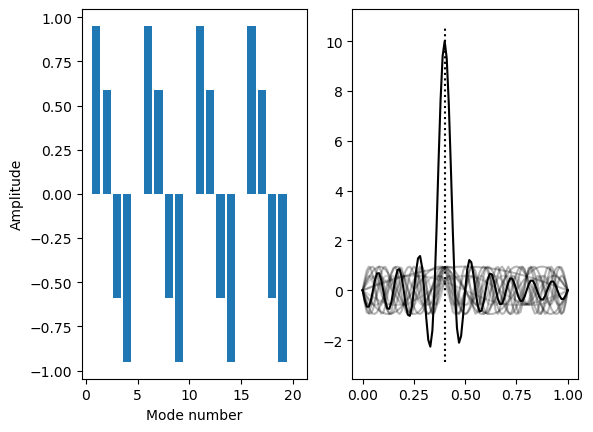

In [94]:
plot()